<a href="https://colab.research.google.com/github/SumLama/DemoRepo/blob/main/salesPrediction/salesPredictionipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%bash
gdown 1LIRkum4Lnn7ZdToKjnls-bd0MBjPqWmU

Downloading...
From: https://drive.google.com/uc?id=1LIRkum4Lnn7ZdToKjnls-bd0MBjPqWmU
To: /content/ads.csv
100%|██████████| 4.76k/4.76k [00:00<00:00, 10.7MB/s]


In [ ]:
The dataset appears to be a marketing dataset that contains information on advertising spend across different media channels (TV, radio, and newspaper) and the corresponding sales figures. Each row represents a single observation or record, and the columns provide the following information:
•	Unnamed: 0: An index column, which seems to be a row identifier.
•	TV: The amount of money spent on TV advertising for that observation.
•	radio: The amount of money spent on radio advertising for that observation.
•	newspaper: The amount of money spent on newspaper advertising for that observation.
•	sales: The number of units sold for that observation.
The goal of the dataset is likely to predict the sales figures based on the amounts spent on TV, radio, and newspaper advertising. This is a classic example of a regression problem where the target variable (sales) is continuous.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
df = pd.read_csv('ads.csv')

In [ ]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [ ]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [ ]:
df1=df.drop(columns=['Unnamed: 0'],axis=1)
df1


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [ ]:
df1.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

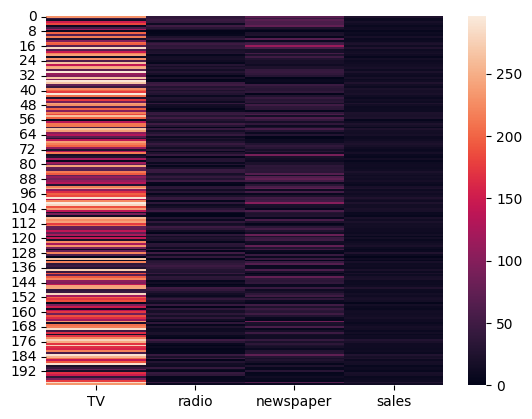

In [ ]:
sns.heatmap(df1)

# There is no missing values

# Check for the outliers using box plot

{'whiskers': [<matplotlib.lines.Line2D at 0x7e7b1a0bc490>,
 'caps': [<matplotlib.lines.Line2D at 0x7e7b1a0bc9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e7b1a0bc1f0>,
 'medians': [<matplotlib.lines.Line2D at 0x7e7b1a0bcf10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7e7b1a0bd1b0>,
 'means': []}

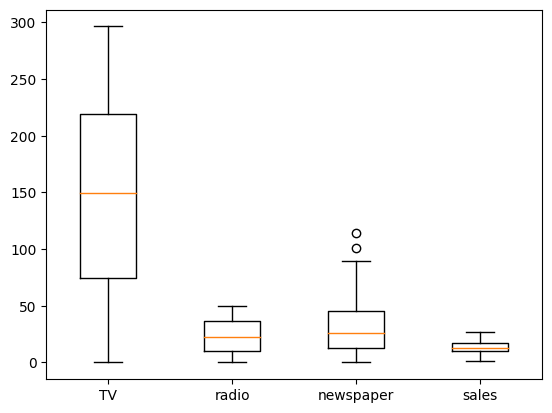

In [ ]:
labels=['TV','radio','newspaper','sales']
plt.boxplot(df1,labels=labels)

* less number of outlier is present in the newspaper.other columns doesnot have any outliers

# Lets see the data distribution

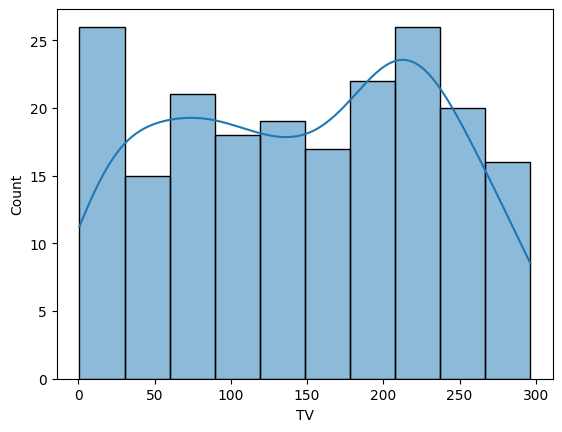

In [ ]:
sns.histplot(df['TV'],kde=True,bins=10)
plt.show()

# The data are seem to be normally distributed

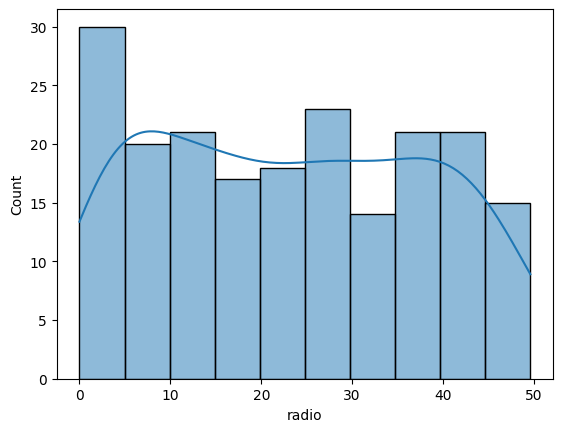

In [ ]:
sns.histplot(df['radio'],kde=True,bins=10)
plt.show()

# The data are seem to be normally distributed

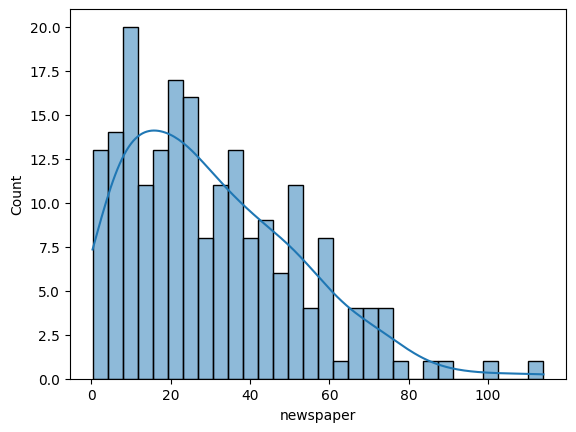

In [ ]:
sns.histplot(df['newspaper'],kde=True,bins=30)
plt.show()

# The in the newspaper columns is seen to be +vely skewed as the tail is longer towrds the +ve side


# To see the correlation between the  columns

In [ ]:
correlation = df1.corr()
correlation

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

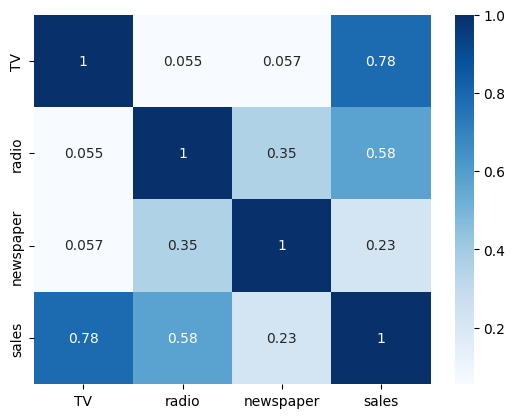

In [ ]:
sns.heatmap(correlation,annot=True,cmap="Blues")

* From the above matrix, sales  has max dependent with TV columns, then radio and then newspaper column.

# Single linear regression

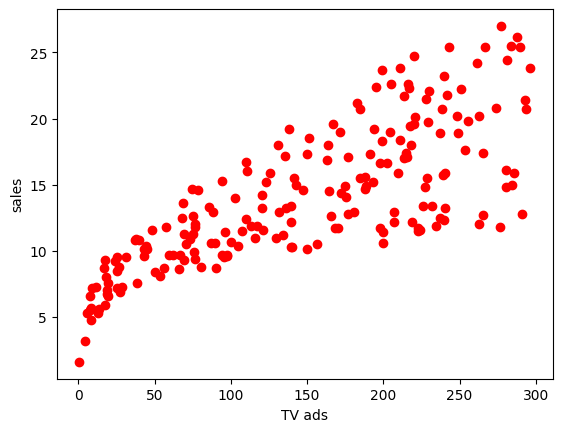

In [ ]:
plt.xlabel('TV ads')
plt.ylabel('sales')
plt.scatter(df.TV,df.sales,marker='o',color='red')

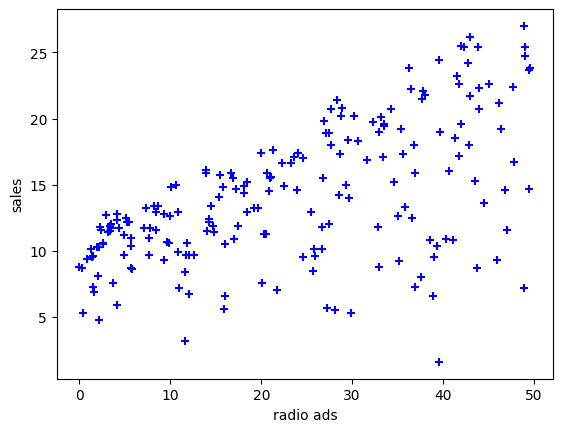

In [ ]:
plt.xlabel('radio ads')
plt.ylabel('sales')
plt.scatter(df.radio,df.sales,marker='+',color='blue')

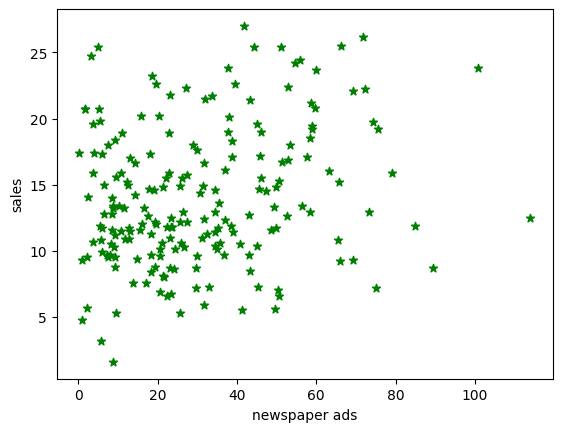

In [ ]:
plt.xlabel('newspaper ads')
plt.ylabel('sales')

plt.scatter(df.newspaper,df.sales,marker='*',color='green')

# Using single linear regression
* Regression to predict the sales based on TV ads.

In [ ]:
X= df1.loc[:,['TV']]
Y=df1['sales']

In [ ]:
X

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [ ]:
Y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

#Training and testing data split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(  X, Y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
m = model.coef_
c = model.intercept_
print(f"coef_ = {m[0]}")
print(f"intercept_ = {c}")

coef_ = 0.046529733705443346
intercept_ = 7.119638430592953


#Evalautaion on test data

In [ ]:
y_pred = model.predict(X_test)


**Calculation of MSE**

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_true=Y_test,y_pred=y_pred)
print(f"Mean squared error = {round(mse, 2)}")

Mean squared error = 10.2


**Calculation of MAE**

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true=Y_test, y_pred=y_pred)
print(f"Mean absolute error = {round(mae, 2)}")

Mean absolute error = 2.44


**r2_score**

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_true=Y_test, y_pred=y_pred)
print(f"r2_score = {round(r2, 3)}")

r2_score = 0.677


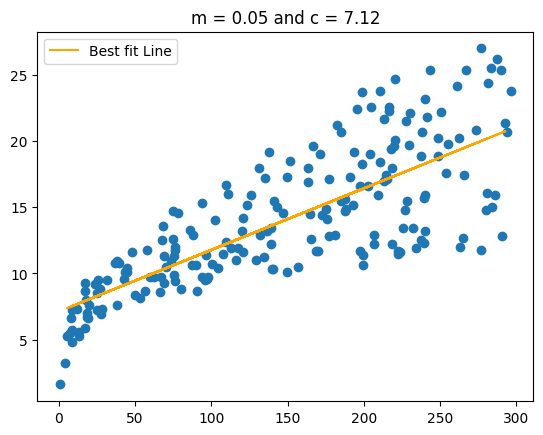

In [ ]:
plt.scatter(x=X, y=Y)
plt.plot(X_test, y_pred, color = 'orange', label = 'Best fit Line')
plt.title(f"m = {round(m[0], 2)} and c = {round(c, 2)}")
plt.legend()
plt.show()

In [ ]:
df1

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [ ]:
pred_sales = model.predict([[165]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
pred_sales

array([14.79704449])

In [ ]:
import pickle
with open('model.pickle', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
with open('model.pickle','rb') as file:
  slr_model=pickle.load(file)

In [ ]:
slr_model.predict([[165]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([14.79704449])

# Using lasso Ridge regression

In [ ]:
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_true=Y_test,y_pred=y_pred)
print(f"Mean squared error = {round(mse, 2)}")

mae = mean_absolute_error(y_true=Y_test, y_pred=y_pred)
print(f"Mean absolute error = {round(mae, 2)}")

r2 = r2_score(y_true=Y_test, y_pred=y_pred)
print(f"r2_score = {round(r2, 3)}")

Mean squared error = 10.21
Mean absolute error = 2.45
r2_score = 0.676


In [ ]:
sales = model.predict([[165]])
sales

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([14.79492918])

# Using ridge regression

In [ ]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_true=Y_test,y_pred=y_pred)
print(f"Mean squared error = {round(mse, 2)}")

mae = mean_absolute_error(y_true=Y_test, y_pred=y_pred)
print(f"Mean absolute error = {round(mae, 2)}")

r2 = r2_score(y_true=Y_test, y_pred=y_pred)
print(f"r2_score = {round(r2, 3)}")

Mean squared error = 10.2
Mean absolute error = 2.44
r2_score = 0.677


In [ ]:
sales = model.predict([[165]])
sales

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


array([14.79704388])

#  Using SVR

In [ ]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,Y_train)

SVR()

In [ ]:
y_pred = svr.predict(X_test)
mse = mean_squared_error(y_true=Y_test,y_pred=y_pred)
print(f"Mean squared error = {round(mse, 2)}")

mae = mean_absolute_error(y_true=Y_test, y_pred=y_pred)
print(f"Mean absolute error = {round(mae, 2)}")

r2 = r2_score(y_true=Y_test, y_pred=y_pred)
print(f"r2_score = {round(r2, 3)}")

Mean squared error = 11.11
Mean absolute error = 2.62
r2_score = 0.648


In [ ]:
sales = svr.predict([[165]])
sales

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


array([14.62419578])

* Among all in the above, sible linear regression has better r2_score and states it works better to calculate the target variable

# Multi-linear regression

In [ ]:
df1

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [ ]:
X = df1.drop(columns=['sales'],axis = 1)

In [ ]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [ ]:
Y = df1['sales']
Y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

# scatter plot to see relationships between tv and sales

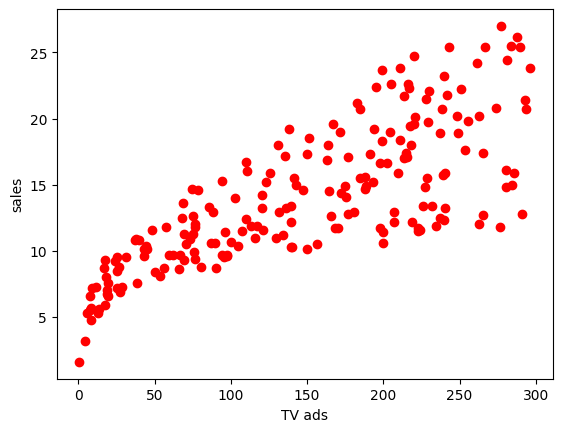

In [ ]:
plt.xlabel('TV ads')
plt.ylabel('sales')
plt.scatter(df.TV,df.sales,marker='o',color='red')

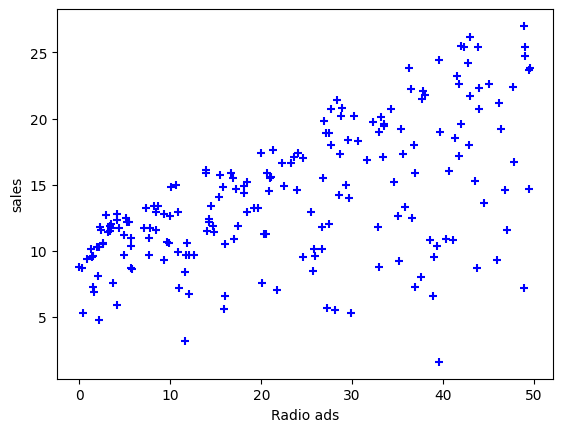

In [ ]:
plt.xlabel('Radio ads')
plt.ylabel('sales')
plt.scatter(df.radio, df.sales,marker='+',color='blue')

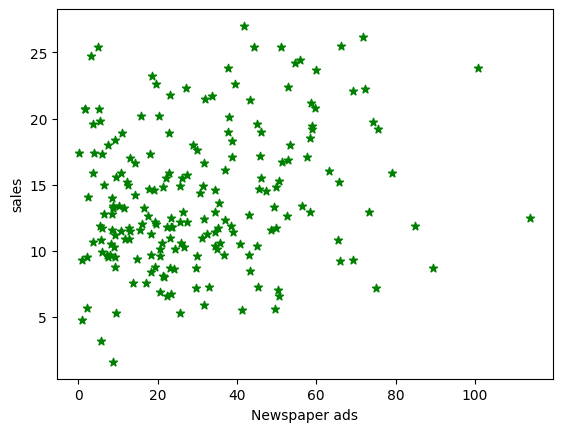

In [ ]:
plt.xlabel('Newspaper ads')
plt.ylabel('sales')
plt.scatter(df.newspaper,df.sales,marker='*',color='green')

# train test data split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split( X, Y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(160, 3)

In [ ]:
X_test.shape

(40, 3)

In [ ]:
Y_train.shape

(160,)

In [ ]:
Y_test.shape


(40,)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
m = model.coef_
c = model.intercept_
print(f"coef_ = {m}")
print(f"intercept_ = {c}")

coef_ = [0.04472952 0.18919505 0.00276111]
intercept_ = 2.979067338122629


# Evalauation on test data

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
mse = mean_squared_error(y_true=Y_test, y_pred=y_pred)
print(f"Mean squared error = {round(mse, 2)}")

mae = mean_absolute_error(y_true=Y_test, y_pred=y_pred)
print(f"Mean absolute error = {round(mae, 2)}")
r2 = r2_score(y_true=Y_test, y_pred=y_pred)
print(f"r2_score = {round(r2, 3)}")

Mean squared error = 3.17
Mean absolute error = 1.46
r2_score = 0.899


In [ ]:
model.predict([[120,40,70]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([16.10768961])

# As linear model is likely to overfit so we can use lasso and ridge regression for regularization
* Using lasso regression

In [ ]:

model = Lasso()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_true=Y_test, y_pred=y_pred)
print(f"r2_score = {round(r2, 3)}")

r2_score = 0.9


In [ ]:
model.predict([[120,40,70]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([15.99118153])

* Using ridge regression

In [ ]:
model = Ridge()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_true=Y_test, y_pred=y_pred)
print(f"r2_score = {round(r2, 3)}")

r2_score = 0.899


In [ ]:
model.predict([[120,40,70]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


array([16.10765052])

Using SVR

In [ ]:
svr = SVR()
svr.fit(X_train,Y_train)

SVR()

In [ ]:
y_pred = svr.predict(X_test)
mse = mean_squared_error(y_true=Y_test,y_pred=y_pred)
print(f"Mean squared error = {round(mse, 2)}")

mae = mean_absolute_error(y_true=Y_test, y_pred=y_pred)
print(f"Mean absolute error = {round(mae, 2)}")

r2 = r2_score(y_true=Y_test, y_pred=y_pred)
print(f"r2_score = {round(r2, 3)}")

Mean squared error = 4.01
Mean absolute error = 1.51
r2_score = 0.873


In [ ]:
model.predict([[120,40,70]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


array([16.10765052])

* Above all models, the lasso regression model has high r2_score value i.e 0.9 which means there is only 10% variance betwwen the target varaible and the value calculated from the independent variable Which stated the model fits well to calculated correct target variable